In [52]:
from 有用なスクリプト import load_txt
for sentence in load_txt(path="./吾輩は猫であるutf8.txt")[:10]:
    if len(sentence) > 1:
        print(sentence if len(sentence) < 50 else sentence[:50]+"　（以下略）")

吾輩は猫である

夏目漱石

　吾輩《わがはい》は猫である。名前はまだ無い。

　どこで生れたかとんと見当《けんとう》がつかぬ。何でも薄暗いじめじめした所でニャーニャー泣いていた事　（以下略）
　この書生の掌の裏《うち》でしばらくはよい心持に坐っておったが、しばらくすると非常な速力で運転し始め　（以下略）
　ふと気が付いて見ると書生はいない。たくさんおった兄弟が一｜疋《ぴき》も見えぬ。肝心《かんじん》の母　（以下略）
　ようやくの思いで笹原を這い出すと向うに大きな池がある。吾輩は池の前に坐ってどうしたらよかろうと考え　（以下略）
　吾輩の主人は滅多《めった》に吾輩と顔を合せる事がない。職業は教師だそうだ。学校から帰ると終日書斎に　（以下略）
　吾輩がこの家へ住み込んだ当時は、主人以外のものにははなはだ不人望であった。どこへ行っても跳《は》ね　（以下略）


In [53]:
from 有用なスクリプト import train_tokenizer

tokenizer = train_tokenizer(
    file_path="./吾輩は猫であるutf8.txt",   # テキスト元になるファイル
    vocab_size=128,                       # 辞書の大きさ
    text_to_compress = "吾輩わがはいは猫である。名前はまだ無い。"
)

Tokenizerの指定単語数は 128...
訓練完了

--- テキスト容量比較 ---
比較用サンプル: '吾輩わがはいは猫である。名前はまだ無い。'

[UTF-8 容量]
  bytes: 60
  bits (bytes * 8): 480

[BPE 容量]
  辞書容量: 128
  トークンごとのbits密度 (ceil(log2(vocab_size))): 7
  トークン数: 60
  トークン: [85, 110, 78, 88, 76, 58, 83, 96, 109, 83, 95, 106, 83, 95, 63, 83, 95, 98, 83, 95, 63, 87, 106, 60, 83, 95, 56, 83, 95, 96, 83, 96, 105, 83, 94, 96, 85, 110, 107, 85, 103, 107, 83, 95, 63, 83, 95, 78, 83, 95, 126, 87, 98, 50, 83, 95, 98, 83, 94, 96]
  bits (トークン数 * bits_per_token): 420

--- 📊 最終結果 ---
UTF-8 Bits: 480
BPE Bits:   420
-> 圧縮比率: 1.14 (UTF-8 bits / BPE bits)


In [54]:
from 有用なスクリプト import load_txt

for sentence in load_txt(path="./吾輩は猫であるutf8.txt"):
    assert tokenizer.decode(tokenizer.encode(sentence).ids) == sentence
        

In [55]:
適当な文章 = "論文を書くのは辛い El Psy Congroo 🥺"
print("適当な文章:\t", 適当な文章)
トークン = tokenizer.encode(適当な文章).ids
print("トークン: \t", トークン[:15])
日本語文書 = tokenizer.decode(トークン)
print("復元した日本語:\t", 日本語文書)


適当な文章:	 論文を書くのは辛い El Psy Congroo 🥺
トークン: 	 [88, 60, 116, 86, 116, 101, 83, 96, 112, 86, 121, 72, 83, 95, 109]
復元した日本語:	 論文を書くのは辛い l sy ongroo ���


In [56]:

tokenizer = train_tokenizer(
    file_path=[         # テキスト元になるファイル
        "./吾輩は猫であるutf8.txt",
        "./text/emoji.txt",
        "./text/harry potter 1.txt"
    ],                  
    vocab_size=5000,    # 辞書の大きさ
    text_to_compress = "吾輩わがはいは猫である。名前はまだ無い。"
)
print("----------------------------")
適当な文章 = "月がきれいです El Psy Congroo 🥺"
print("適当な文章:\t", 適当な文章)
トークン = tokenizer.encode(適当な文章).ids
print("トークン: \t", トークン[:15])
日本語文書 = tokenizer.decode(トークン)
print("復元した日本語:\t", 日本語文書)


Tokenizerの指定単語数は 5000...
訓練完了

--- テキスト容量比較 ---
比較用サンプル: '吾輩わがはいは猫である。名前はまだ無い。'

[UTF-8 容量]
  bytes: 60
  bits (bytes * 8): 480

[BPE 容量]
  辞書容量: 5000
  トークンごとのbits密度 (ceil(log2(vocab_size))): 13
  トークン数: 13
  トークン: [460, 3696, 813, 167, 808, 324, 164, 2836, 167, 1158, 566, 151, 164]
  bits (トークン数 * bits_per_token): 169

--- 📊 最終結果 ---
UTF-8 Bits: 480
BPE Bits:   169
-> 圧縮比率: 2.84 (UTF-8 bits / BPE bits)
----------------------------
適当な文章:	 月がきれいです El Psy Congroo 🥺
トークン: 	 [493, 170, 230, 199, 151, 314, 112, 26, 51, 112, 32, 58, 64, 300, 46]
復元した日本語:	 月がきれいです El Psy ongroo 🥺


In [57]:
パターン１ = [1, 2, 3, 4, 5, ...]
パターン２ = [1, 4, 9, 16, 25, ...]
パターン３ = [1, 2, 4, 8, 16, ...]

In [58]:
def パターン１(x: int):
    # ｘが１から５の時、ｘしか値として戻っていない；
    return x + (x - 1) * (x - 2) * (x - 3) * (x - 4) * (x - 5) 


新パターン１ = [パターン1(x) for x in range(1, 7)]
print("新パターン１ ->", 新パターン1)

新パターン１ -> [1, 2, 3, 4, 5, 126]


In [59]:
文書 = "月がきれい"
for idx in range(0, len(文書)):
    文書断片 = 文書[: idx + 1]
    tokens = tokenizer.encode(文書断片)
    print( 文書断片, "　" * (len(文書) - idx),":", end=" ")
    print(tokens.ids)

月 　　　　　 : [493]
月が 　　　　 : [493, 170]
月がき 　　　 : [493, 170, 230]
月がきれ 　　 : [493, 170, 230, 199]
月がきれい 　 : [493, 170, 230, 199, 151]


In [72]:
from transformers import pipeline
import torch

ckpt = "google/gemma-3-1b-pt"
pipe = pipeline(
    "text-generation", 
    model=ckpt, 
    # device="cuda", 
    torch_dtype=torch.bfloat16
)
output = pipe("東京は日本の", max_new_tokens=20)
print(output[0]['generated_text'])

Device set to use cpu


東京は日本の首都として、1871年に日本国憲法によって首都に指定され、明治時代


In [73]:
for idx in range(1,4):
    output = pipe("東京は日本の", max_new_tokens=20)
    print(f"トライアル{idx}:",output[0]['generated_text'], end="\n---------------\n")

トライアル1: 東京は日本の首都で、大都市の中でも人口の多いエリアの一つです。東京は日本を代表する観光
---------------
トライアル2: 東京は日本の首都であり、日本で最も人口が多い都市です。

東京は日本の首都であり、日本で
---------------
トライアル3: 東京は日本の首都、そして世界でも有数の観光地です。東京は多くの観光スポットがあり、その中でも
---------------


In [9]:
prompt = "東京は日本の"
model_inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

input_len = model_inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=1, do_sample=False)
    generation = generation[0][input_len:]

decoded = tokenizer.decode(generation, skip_special_tokens=True)
print(decoded)

首都


In [13]:
prompt = "東京は日本の"
max_new_token = 13
for i in range(max_new_token):
    model_inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    input_len = model_inputs["input_ids"].shape[-1]

    with torch.inference_mode():
        generation = model.generate(**model_inputs, max_new_tokens=1, do_sample=False)
        generation = generation[0][input_len:]

    decoded = tokenizer.decode(generation, skip_special_tokens=True)
    print(prompt+decoded)
    prompt +=decoded

東京は日本の首都
東京は日本の首都であり
東京は日本の首都であり、
東京は日本の首都であり、日本の
東京は日本の首都であり、日本の政治
東京は日本の首都であり、日本の政治、
東京は日本の首都であり、日本の政治、経済
東京は日本の首都であり、日本の政治、経済、
東京は日本の首都であり、日本の政治、経済、文化
東京は日本の首都であり、日本の政治、経済、文化の中心
東京は日本の首都であり、日本の政治、経済、文化の中心地
東京は日本の首都であり、日本の政治、経済、文化の中心地です
東京は日本の首都であり、日本の政治、経済、文化の中心地です。


In [39]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

#　huggingface からモデルを引っ張て使います
from transformers import AutoTokenizer, AutoModelForCausalLM

# 使うモデルを　google/gemma-3-1b-pt　に指定
ckpt = "google/gemma-3-1b-pt"
tokenizer = AutoTokenizer.from_pretrained(ckpt)
model = AutoModelForCausalLM.from_pretrained(ckpt)

# 1. プロンプト
prompt = "6+2="

# 2. プロンプトをトークン化、ここのinput_idsは整数のリストです
input_ids = tokenizer(prompt, return_tensors="pt").input_ids

# 3. モデルに適用する
with torch.no_grad(): 
    outputs = model(input_ids)

# 4. 最後の出力を抽出する
next_token_logits = outputs.logits[0, -1, :]

# 5. 確率を算出する
next_token_probs = torch.softmax(next_token_logits, dim=-1)

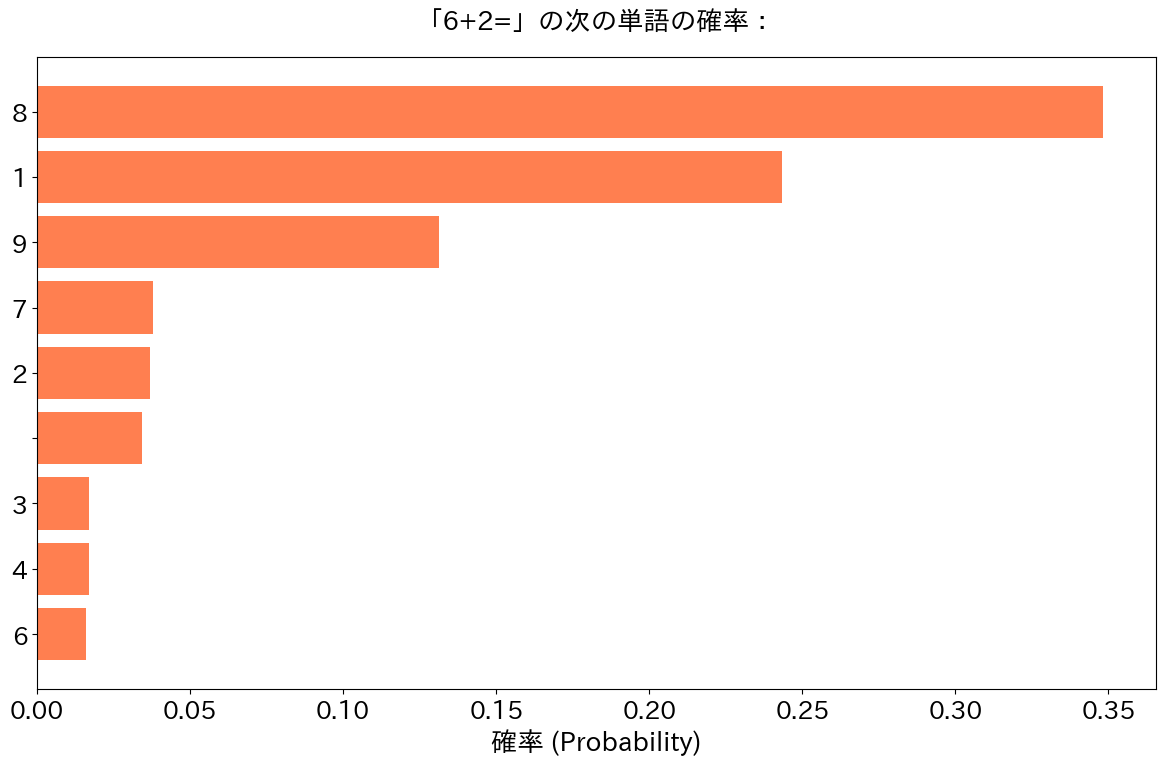

In [40]:
def visualize_next_token_distribution(probabilities, tokenizer, top_k=10, prompt=""):
    # --- Matplotlib Configuration for Larger Font ---
    # Set a larger default font size for all text elements in the plot
    plt.rcParams.update({'font.size': 18}) 

    # Convert to numpy array for easier sorting
    probs_np = probabilities.cpu().numpy()
    
    # Get the indices (token IDs) of the top_k probabilities, sorted descendingly
    top_k_indices = np.argsort(probs_np)[::-1][:top_k]
    
    # Get the actual tokens (strings) and their probability values
    top_k_tokens = [tokenizer.decode(idx).strip() for idx in top_k_indices] # .strip() cleans up spaces
    top_k_probs = probs_np[top_k_indices]

    # --- Create the Visualization (Adjusted Size) ---
    # Use a slightly larger height to accommodate the larger font without crowding
    plt.figure(figsize=(12, 8)) 
    
    # Create a horizontal bar chart
    plt.barh(top_k_tokens[::-1], top_k_probs[::-1], color='coral')
    
    # Set X-axis label with larger font
    plt.xlabel('確率 (Probability)', fontsize=19) 
    
    # Set title with larger font
    plt.title(f'「{prompt}」の次の単語の確率：', fontsize=19, pad=20) 
    
    plt.tight_layout()
    plt.savefig("../pics/next_token3.svg")
    plt.show() 

visualize_next_token_distribution(next_token_probs, tokenizer, top_k=10,prompt=prompt)


In [ ]:
outputs.logits

torch.Size([1, 4, 262144])

In [ ]:
emb_layer = model.get_input_embeddings()
hidden_states = emb_layer(input_ids)

tensor([[[ 0.0476,  0.0844, -0.1388,  ..., -0.0370, -0.1176,  0.2672],
         [ 0.2558, -0.7582,  0.0891,  ...,  0.4889,  0.2051, -2.2705],
         [ 0.7582, -0.4620, -1.3424,  ..., -0.7043,  0.1896, -0.1279],
         [ 0.4143, -0.1440, -0.4599,  ..., -0.2123,  0.3273, -1.8230],
         [ 0.1657, -2.3865, -0.2248,  ..., -0.2507, -0.3501, -2.0965]]],
       grad_fn=<MulBackward0>)